<a href="https://colab.research.google.com/github/BeshoyAbdALMasih/Tabular_Data_Classification/blob/main/Tabular_Data_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mssmartypants/rice-type-classification")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'rice-type-classification' dataset.
Path to dataset files: /kaggle/input/rice-type-classification


In [2]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
device= "cuda" if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [4]:
import os
os.listdir(path)

['riceClassification.csv']

In [5]:
df=pd.read_csv(path+'/riceClassification.csv')
df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [6]:
df['Class'].unique()

array([1, 0])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [8]:
df.drop(columns=['id'],inplace=True)

In [9]:
orignal_df=df.copy()

for col in df.columns:
  df[col]=df[col]/df[col].abs().max()

df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,0.444368,0.503404,0.775435,0.744658,0.424873,0.666610,0.741661,0.537029,0.844997,0.368316,1.0
1,0.281293,0.407681,0.622653,0.750489,0.273892,0.530370,0.804230,0.409661,0.919215,0.371471,1.0
2,0.298531,0.416421,0.630442,0.756341,0.284520,0.546380,0.856278,0.412994,0.959862,0.374747,1.0
3,0.300979,0.420463,0.629049,0.764024,0.286791,0.548616,0.883772,0.414262,0.961818,0.379222,1.0
4,0.361704,0.464626,0.682901,0.775033,0.345385,0.601418,0.867808,0.452954,0.966836,0.386007,1.0


In [10]:
X=np.array(df.drop(columns='Class'))
y=np.array(df['Class'])
x_train, x_test, y_train ,y_test=train_test_split(X,y,train_size=0.7)
x_test , x_val ,y_test , y_val = train_test_split(x_test,y_test,train_size=0.5) #split test data

print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(12729, 10)
(2728, 10)
(2728, 10)


In [11]:
class dataset(Dataset):
  def __init__(self,data,label):
    self.data=torch.tensor(data,dtype=torch.float32).to(device)
    self.label=torch.tensor(label,dtype=torch.float32).to(device)

  def __len__(self):
    return len(self.data)

  def __getitem__(self,index):
    return self.data[index] , self.label[index]

In [12]:
train_data=dataset(x_train,y_train)
val_data=dataset(x_val,y_val)
test_data=dataset(x_val,y_val)

In [13]:
train_dataloader=DataLoader(train_data,batch_size=32,shuffle=True)
val_dataloader=DataLoader(val_data,batch_size=32,shuffle=True)
test_dataloader=DataLoader(test_data,batch_size=32,shuffle=True)

In [14]:
hidden_n=10

class My_Model (nn.Module):
  def __init__(self,):
    super(My_Model,self).__init__()
    self.input_layer=nn.Linear(X.shape[1],hidden_n)
    self.linear=nn.Linear(hidden_n,1)
    self.sigmoid=nn.Sigmoid()

  def forward(self,x):
    x=self.input_layer(x)
    x=self.linear(x)
    x=self.sigmoid(x)
    return x

model=My_Model().to(device)

In [15]:
summary(model,(X.shape[1],))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 10]             110
            Linear-2                    [-1, 1]              11
           Sigmoid-3                    [-1, 1]               0
Total params: 121
Trainable params: 121
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [16]:
criterion=nn.BCELoss(reduction='mean')
optimizer=Adam(model.parameters(),lr=1e-3)

In [17]:
total_loss_train_plot=[]
total_loss_val_plot=[]
total_acc_val_plot=[]
total_acc_train_plot=[]

In [18]:
epochs=10

for epoch in range(epochs):
  total_train_loss=0
  total_train_acc=0
  total_val_loss=0
  total_val_acc=0

  for  data_ in train_dataloader:
    input,label=data_
    pred=model(input).squeeze(1)
    batch_loss_train=criterion(pred,label)
    total_train_loss += batch_loss_train.item()
    acc = ((pred).round() == label).sum().item()
    total_train_acc += acc
    batch_loss_train.backward()
    optimizer.step()
    optimizer.zero_grad()

  with torch.no_grad():
    for  data_ in val_dataloader:
      input,label=data_
      pred=model(input).squeeze(1)
      batch_loss_val=criterion(pred,label)
      total_val_loss += batch_loss_val.item()
      acc = ((pred).round() == label).sum().item()
      total_val_acc += acc

  total_loss_train_plot.append(round(total_train_loss/1000,4))
  total_acc_train_plot.append(round(total_train_acc/train_data.__len__() *100,4))

  total_loss_val_plot.append(round(total_val_loss/1000,4))
  total_acc_val_plot.append(round(total_val_acc/val_data.__len__() *100,4))

  print(f'''epoch no. : {epoch+1},
   train_loss: {round(total_train_loss/1000,4)},train accuracy {round(total_train_acc/train_data.__len__() *100,4)},
   valdation_loss: {round(total_val_loss/1000,4)},validation accuracy {round(total_val_acc/val_data.__len__() *100,4)}''')

epoch no. : 1,
   train_loss: 0.2399,train accuracy 78.0187,
   valdation_loss: 0.0392,validation accuracy 97.9839
epoch no. : 2,
   train_loss: 0.121,train accuracy 97.7767,
   valdation_loss: 0.0166,validation accuracy 98.2405
epoch no. : 3,
   train_loss: 0.0565,train accuracy 98.3345,
   valdation_loss: 0.0093,validation accuracy 98.3138
epoch no. : 4,
   train_loss: 0.036,train accuracy 98.4759,
   valdation_loss: 0.0067,validation accuracy 98.2038
epoch no. : 5,
   train_loss: 0.0277,train accuracy 98.5073,
   valdation_loss: 0.0053,validation accuracy 98.4604
epoch no. : 6,
   train_loss: 0.0235,train accuracy 98.6173,
   valdation_loss: 0.0046,validation accuracy 98.3871
epoch no. : 7,
   train_loss: 0.021,train accuracy 98.5231,
   valdation_loss: 0.0042,validation accuracy 98.7903
epoch no. : 8,
   train_loss: 0.0195,train accuracy 98.5938,
   valdation_loss: 0.0038,validation accuracy 98.8636
epoch no. : 9,
   train_loss: 0.0185,train accuracy 98.6016,
   valdation_loss: 0.0

In [23]:
with torch.no_grad():
  total_test_acc=0
  total_test_loss=0
  for data_ in test_dataloader:
    input , label =data_
    pred=model(input).squeeze(1)
    batch_loss=criterion(pred,label).item()
    total_test_loss+=batch_loss
    acc= ((pred).round() == label).sum().item()
    total_test_acc+=acc

print("accuracy",round(total_test_acc/test_data.__len__() *100,4))

accuracy 98.7903


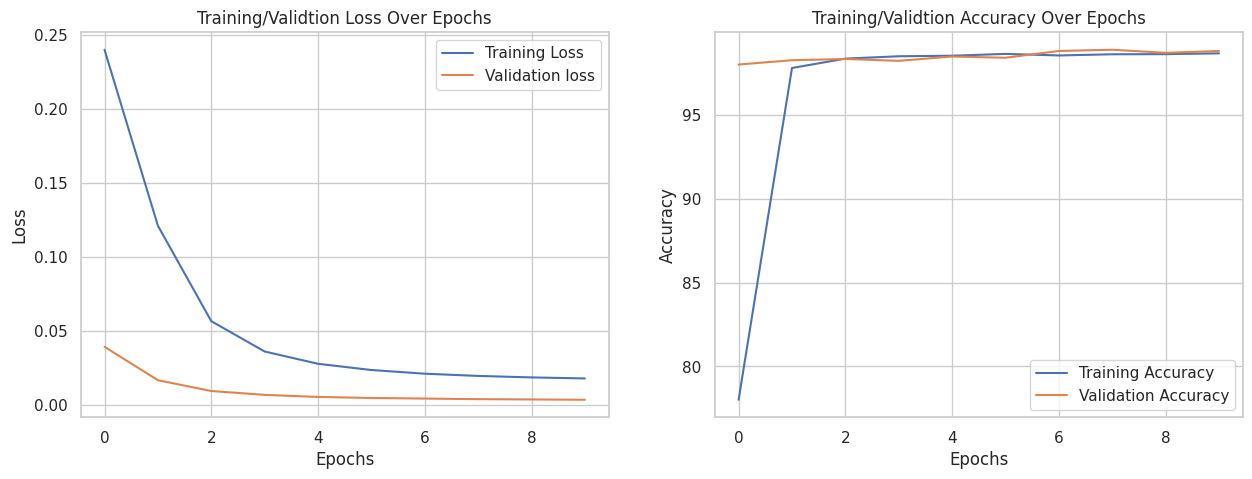

In [29]:
sns.set(style='whitegrid')
fig , ax =plt.subplots(ncols=2,nrows=1,figsize=(15,5))

ax[0].plot(total_loss_train_plot,label='Training Loss')
ax[0].plot(total_loss_val_plot,label="Validation loss")
ax[0].set_title("Training/Validtion Loss Over Epochs")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[0].legend()

ax[1].plot(total_acc_train_plot,label='Training Accuracy')
ax[1].plot(total_acc_val_plot,label="Validation Accuracy")
ax[1].set_title("Training/Validtion Accuracy Over Epochs")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
ax[1].legend()

plt.show()